In [43]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib notebook

Light limitation:

$$ I = I_0 e^{-K_d H} $$
$$ k_{light} = \frac{I}{I+I_{sat}}$$ 

Nutrient limitation:
$$ k_{DIN} = \frac{N}{N+N_{sat}}$$


$$\frac{d N}{d t} = -\alpha k_{prod} k_{light} P$$
$$\frac{d P}{d t} = k_{prod} k_{light} P - k_{mort} P $$

No supplement or cycling of DIN -- just a starting pool and uptake.

Any chance a closed-form solution exists? Seems unlikely.

$$y_1^{\prime} = -\frac{y_1}{y_1+1} y_2$$
$$y_2^{\prime} = \left( \frac{y_1}{y_1+1} - 1 \right) y_2$$

$$
\frac{dO}{dt} = 
$$

<IPython.core.display.Javascript object>


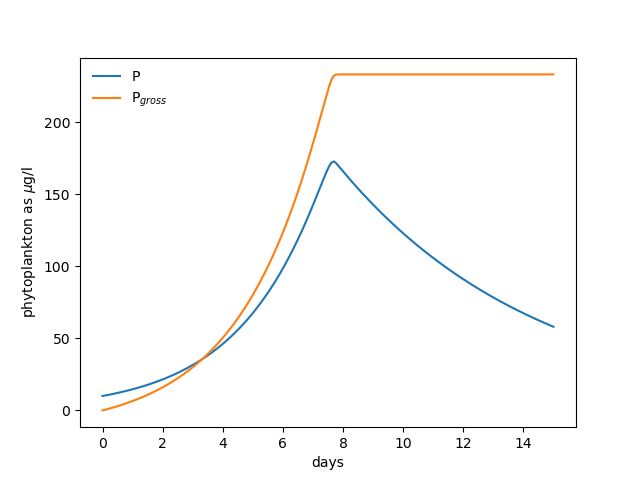

In [44]:
# totally made up numbers to get a bloom over a week, and over
# 100 ug/l

I0=100. # insolation
Isat=10.
N0=35 # initial DIN
Nsat=0.5
Kd=1.0 # light extinction
kmort=0.15 # per day
kprod=1.2 # per day, max

alpha=0.15 # stoichiometry, uM DIN per ug/l chl production.

# The tracer results provide an age, a concentration, and 
# a mean depth.
Hmean=2.5 # mean depth exposure

def diff(state,t):
    P,Ptot=state
    
    Imean=I0*np.exp(-Kd*Hmean)
    N=(N0-alpha*Ptot)
    kDIN=N/(N+Nsat)
    kLight=Imean/(Imean+Isat)
    dPtot = kprod*kLight*kDIN*P
    dP = -kmort*P + dPtot
    return np.r_[dP,dPtot]

t_vals=np.linspace(0,15,200)
result=odeint(diff,[10,0],t_vals)

fig,ax=plt.subplots()
ax.plot(t_vals,result[:,0],label='P')
ax.plot(t_vals,result[:,1],label='P$_{gross}$')
ax.legend(frameon=0)
ax.set_xlabel('days')
ax.set_ylabel(r'phytoplankton as $\mu$g/l') ;

<IPython.core.display.Javascript object>


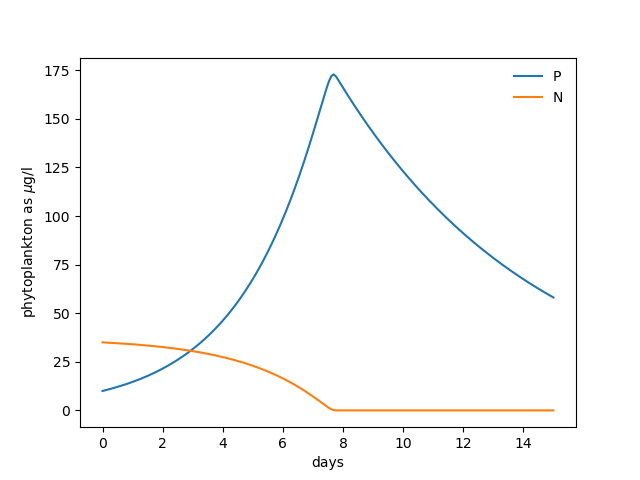

In [46]:
# Rewrite to make nitrogen a state variable.

# totally made up numbers to get a bloom over a week, and over
# 100 ug/l

I0=100. # insolation
Isat=10.
N0=35 # initial DIN
Nsat=0.5
Kd=1.0 # light extinction
kmort=0.15 # per day
kprod=1.2 # per day, max

alpha=0.15 # stoichiometry, uM DIN per ug/l chl production.

# The tracer results provide an age, a concentration, and 
# a mean depth.
Hmean=2.5 # mean depth exposure

def diff(state,t):
    P,N=state
    
    Imean=I0*np.exp(-Kd*Hmean)
    #N=(N0-alpha*Ptot)
    kDIN=N/(N+Nsat)
    kLight=Imean/(Imean+Isat)
    dPtot = kprod*kLight*kDIN*P
    dP = -kmort*P + dPtot
    dN = -alpha*dPtot
    return np.r_[dP,dN]

t_vals=np.linspace(0,15,200)
result=odeint(diff,[10,N0],t_vals)

fig,ax=plt.subplots()
ax.plot(t_vals,result[:,0],label='P')
ax.plot(t_vals,result[:,1],label='N')
ax.legend(frameon=0)
ax.set_xlabel('days')
ax.set_ylabel(r'phytoplankton as $\mu$g/l') ;